# Практическое задание 2

#### 1. Напишите функцию, которая возвращает сумму двух вещественных аргументов a и b, а к ней декоратор, который делает так, чтобы возвращаемое значение функцией было по модулю 5

In [1]:
def mod5(func):
    def wrapper(*args, **kwargs):
        return func(*args, **kwargs) % 5
    return wrapper

@mod5
def normal_sum(a, b):
    return a + b

normal_sum(21, 42)

#### 2. Попробуйте описать своими словами основные отличия SMOTE от ADASYN, ознакомившись с документацией к ним

Обычный SMOTE генерирует примерно одинаковое число синтетических примеров для каждого исходного.

А ADASYN генерирует больше искусственных примеров для тех примеров, что менее "похожи" на остальные, то есть более далеки от своих ближайших соседей. 

Получается, что ADASYN делает выборку минорного класса более равномерно распределенной. А SMOTE наоборот, создает примеров больше в более плотных участках пространства примеров.

Это хорошо видно на графиках для простого примера в конце блокнота.

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

from imblearn.over_sampling import SMOTE, ADASYN

In [3]:
X, y = make_classification(n_classes=2, weights=[0.15, 0.85], 
                           n_informative=1, n_redundant=0, 
                           n_features=2, n_clusters_per_class=1, 
                           n_samples=50, random_state=42)

y[49] = 0

In [4]:
def my_plot(X, y, ax):
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, edgecolor='k', s=60)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

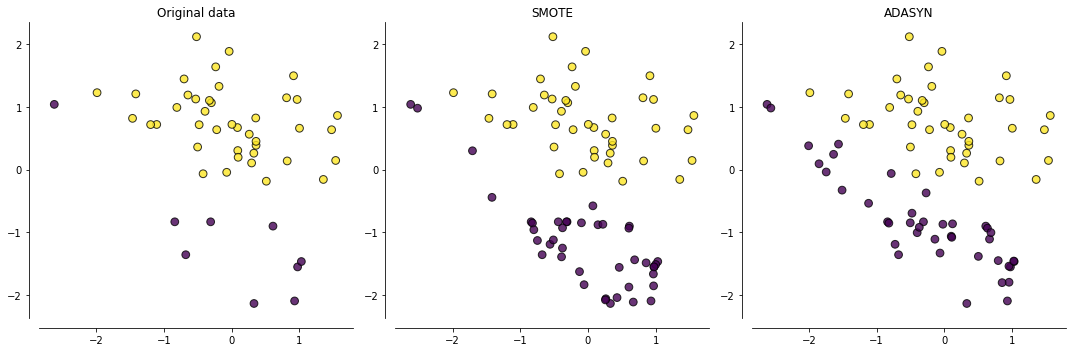

In [5]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 5))

my_plot(X, y, ax0)

ax_arr = ax1, ax2

samplers = SMOTE(random_state=42), ADASYN(random_state=42)
    
for ax, sampler in zip(ax_arr, samplers):
    X_res, y_res = sampler.fit_resample(X, y)
    my_plot(X_res, y_res, ax)

ax0.set_title('Original data')
ax1.set_title('SMOTE')
ax2.set_title('ADASYN')

fig.tight_layout()